NOTE: Add pywaffle to requirements

The lifetime risk of developing colorectal cancer is about 1 in 23 (4.3%) for men. [source](https://www.cancer.org/cancer/types/colon-rectal-cancer/about/key-statistics.html)
 
Men with a faulty MSH6 gene have about a 10% chance of developing bowel cancer over their lifetime. [source](https://www.eviq.org.au/cancer-genetics/consumer-information/3453-facts-for-people-and-families-with-a-faulty-m#what-is-the-risk-of-cancer-for-people-with-a-fault)

By age 75, the risk of developing one of these cancers (colorectal, stomach, small intestine, gallbladder ducts, upper urinary tract, and brain) is 40% for men with an MSH6 gene variant. [source](https://medlineplus.gov/genetics/gene/msh6/#conditions)

The lifetime risk of developing:
- stomach cancer: men (about 1 in 101)
- small intestine: 0.3%
- brain: <1%

## Relative Risk / Risk Ratio (RR)  
The ratio of the probability of an outcome in an exposed group to the probability of an outcome in an unexposed group.

$ RR = \frac{\text{Rate in the experiment group}}{\text{Rate in the control group}} = \frac{\frac{\text{Experiment Group Events}}{\text{Experiment Group Subjects}}}{\frac{\text{Control Group Events}}{\text{Control Group Subjects}}} $ 

Assuming causal effect between the exposure and the outcome, values of relative risk can be interpreted as follows:
- RR = 1: Outcome unaffected
- RR < 1: Risk is decreased (protective factor)
- RR > 1: Risk is increased (risk factor) 

## Odds Ratio (OR)
Essentially the same thing, except we use odds instead of probability.
 
The ratio of the odds of an outcome in an exposed group to the odds of an outcome in an unexposed group.

$ OR = \frac{\text{Odds in the experiment group}}{\text{Odds in the control group}} = \frac{\frac{\text{Experiment Group Events}}{\text{Experiment Group Non-Events}}}{\frac{\text{Control Group Events}}{\text{Control Group Non-Events}}} $ 

Odds Ratio can be interpreted similarly as the Risk Ratio.

## Absolute Risk
Simply the probability of an event.

## Example

[Cancer prevention with aspirin in hereditary colorectal cancer (Lynch syndrome), 10-year follow-up and registry-based 20-year data in the CAPP2 study: a double-blind, randomised, placebo-controlled trial
Burn, JohnBoussioutas, Alex et al.
The Lancet, Volume 395, Issue 10240, 1855 - 1863](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30366-4/fulltext)

`Note to self`: CaPP3 study is underway and results should be published 2024/2025. https://www.capp3.org/about.aspx

861 patients in the study:
- 427 aspirin, 40 (9%) developed colorectal cancer
- 434 placebo, 58 (13%) developed colorectal cancer

In [30]:
import pandas as pd
import numpy as np
from statsmodels.stats.contingency_tables import Table2x2
from scipy.stats import chi2_contingency, power_divergence

df = pd.DataFrame({
    'Group': ['Aspirin', 'Placebo'],
    'Developed_Cancer': [40, 58],
    'Did_Not_Develop_Cancer': [427 - 40, 434 - 58]
})
display(df)

contingency_table = [
    [40, 427 - 40],
    [58, 434 - 58]
]
table = Table2x2(contingency_table)
print("\nContingency Table:")
print(table.table)

# Calculate Relative Risk (Risk Ratio) and its 95% Confidence Interval
alpha = 0.05
risk_ratio = table.riskratio
print(f"\nRelative Risk (RR): {risk_ratio:.2f}")
print(f"95% Confidence Interval for RR: ({table.riskratio_confint(alpha)[0]:.2f}, {table.riskratio_confint(alpha)[1]:.2f})")

# Calculate Odds Ratio (OR) and its 95% Confidence Interval
or_ = table.oddsratio
or_confint = table.oddsratio_confint(alpha)
print(f"\nOdds Ratio (OR): {or_:.2f}")
print(f"95% Confidence Interval for OR: ({or_confint[0]:.2f}, {or_confint[1]:.2f})")

# Perform Chi-Squared Test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"\nChi-Squared Test:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

# Perform G-Test
g_stat, p, dof, ex = chi2_contingency(contingency_table, lambda_="log-likelihood")
print(f"\nG-Test:")
print(f"G-Test Statistic: {g_stat:.4f}")
print(f"p-value: {p:.4f}")

,Group,Developed_Cancer,Did_Not_Develop_Cancer
0,Aspirin,40,387
1,Placebo,58,376



Contingency Table:
[[ 40. 387.]
 [ 58. 376.]]

Relative Risk (RR): 0.70
95% Confidence Interval for RR: (0.48, 1.03)

Odds Ratio (OR): 0.67
95% Confidence Interval for OR: (0.44, 1.03)

Chi-Squared Test:
Chi2 Statistic: 3.0233
p-value: 0.0821

G-Test:
G-Test Statistic: 3.0381
p-value: 0.0813


Calculating RR/OR manually to double-check

In [29]:
experiment_group = 427
experiment_events = 40 
experiment_non_events = experiment_group - experiment_events

control_group = 434
control_events = 58 
control_non_events = control_group - control_events

RR = (experiment_events / experiment_group) / (control_events / control_group)
OR = (experiment_events / experiment_non_events) / (control_events / control_non_events)

print(f"\nRelative Risk (RR): {RR:.2f}")
print(f"\nOdds Ratio (OR): {OR:.2f}")


Relative Risk (RR): 0.70

Odds Ratio (OR): 0.67


In [25]:
# Perform G-Test
expected_freq = (40 + 58) / (427 + 434)
f_exp = [expected_freq * 427, expected_freq * 434]
g_stat, p_g = power_divergence([40, 58], f_exp, lambda_='log-likelihood')
print(f"\nG-Test:")
print(f"G Statistic: {g_stat:.4f}")
print(f"p-value: {p_g:.4f}")


G-Test:
G Statistic: 3.0388
p-value: 0.0813


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle

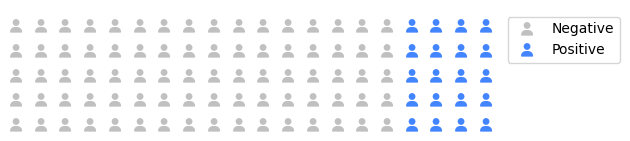

In [16]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[80, 20],
    colors=["#C0C0C0", "#4384FF"],
    icons=['user', 'user'],
    font_size=10,
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': ['Negative', 'Positive'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)

Text(0.5, 0.98, 'Vehicle Production by Vehicle Type')

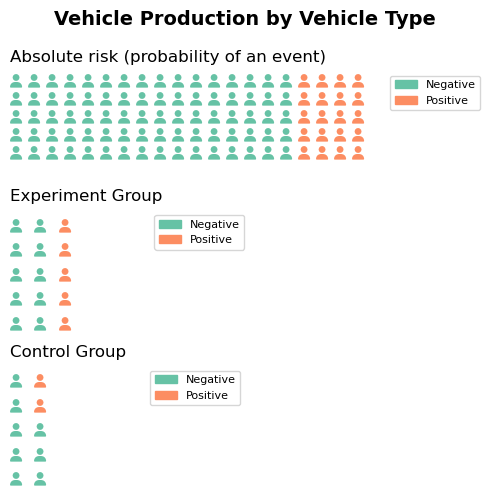

In [35]:
population = [80, 20]
experiment_group = [10, 5]
control_group = [8, 2]

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'icons': ['user', 'user'],
            'font_size': 10,
            'values': population,
            'labels': ['Negative', 'Positive'],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Absolute risk (probability of an event)', 'loc': 'left', 'fontsize': 12}
        },
        312: {
            'icons': ['user', 'user'],
            'font_size': 10,
            'values': experiment_group,
            'labels': ['Negative', 'Positive'],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (2, 1), 'fontsize': 8},
            'title': {'label': 'Experiment Group', 'loc': 'left', 'fontsize': 12}
        },
        313: {
            'icons': ['user', 'user'],
            'font_size': 10,
            'values': control_group,
            'labels': ['Negative', 'Positive'],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (3, 1), 'fontsize': 8},
            'title': {'label': 'Control Group', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,
    # cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(5, 5)
)

fig.suptitle('Vehicle Production by Vehicle Type', fontsize=14, fontweight='bold')
# fig.supxlabel('1 block = 1000 vehicles', fontsize=8, ha='right')

Bayesian Relative Risk Demonstration
-------------------------------------
Prior Probability of Exposure (P(E)): 0.3
Prior Odds of Exposure: 0.4285714285714286

Scenario: No association (RR=1)
P(D|E): 0.1
P(D|¬E): 0.1
Relative Risk (RR): 1.00

Scenario: Increased risk (RR=2)
P(D|E): 0.2
P(D|¬E): 0.1
Relative Risk (RR): 2.00

Scenario: Decreased risk (RR=0.5)
P(D|E): 0.05
P(D|¬E): 0.1
Relative Risk (RR): 0.50



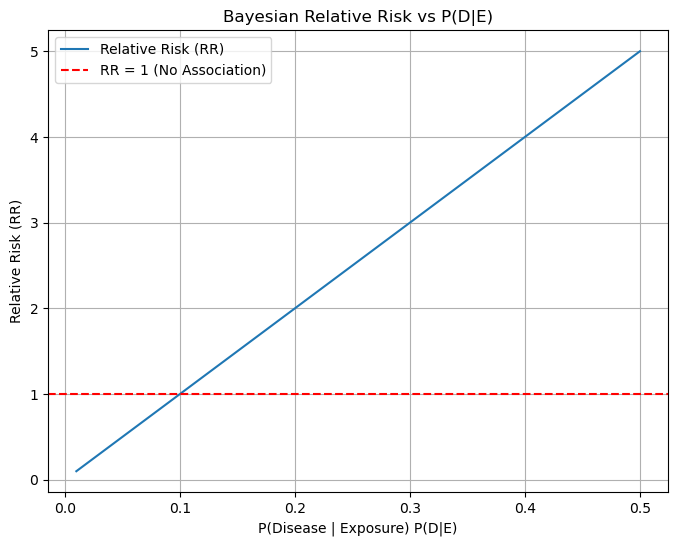

In [ ]:
def compute_relative_risk(
    P_exposed_prior,
    P_disease_given_exposed,
    P_disease_given_not_exposed
):
    """
    Computes the Bayesian relative risk.

    Parameters:
    - P_exposed_prior: Prior probability of exposure (P(E))
    - P_disease_given_exposed: Likelihood P(D|E)
    - P_disease_given_not_exposed: Likelihood P(D|¬E)

    Returns:
    - relative_risk: The Bayesian relative risk
    """
    prior_odds = P_exposed_prior / (1 - P_exposed_prior)
    likelihood_ratio = P_disease_given_exposed / P_disease_given_not_exposed
    posterior_odds = likelihood_ratio * prior_odds
    relative_risk = posterior_odds / prior_odds
    return relative_risk

def demonstrate_bayesian_relative_risk():
    # Define a range of prior probabilities of exposure
    P_exposed_prior = 0.3  # Example: 30% exposed
    
    # Define various scenarios for P(D|E) and P(D|¬E)
    scenarios = [
        {"P_D_E": 0.1, "P_D_not_E": 0.1, "description": "No association (RR=1)"},
        {"P_D_E": 0.2, "P_D_not_E": 0.1, "description": "Increased risk (RR=2)"},
        {"P_D_E": 0.05, "P_D_not_E": 0.1, "description": "Decreased risk (RR=0.5)"},
    ]
    
    print("Bayesian Relative Risk Demonstration")
    print("-------------------------------------")
    print(f"Prior Probability of Exposure (P(E)): {P_exposed_prior}")
    print(f"Prior Odds of Exposure: {P_exposed_prior / (1 - P_exposed_prior)}\n")
    
    for scenario in scenarios:
        P_D_E = scenario["P_D_E"]
        P_D_not_E = scenario["P_D_not_E"]
        description = scenario["description"]
        
        RR = compute_relative_risk(P_exposed_prior, P_D_E, P_D_not_E)
        
        print(f"Scenario: {description}")
        print(f"P(D|E): {P_D_E}")
        print(f"P(D|¬E): {P_D_not_E}")
        print(f"Relative Risk (RR): {RR:.2f}\n")
    
    # Visualizing how RR changes with different P(D|E) and P(D|¬E)
    P_D_E_values = np.linspace(0.01, 0.5, 100)
    P_D_not_E_fixed = 0.1  # Fixed P(D|¬E)
    RR_values = [
        compute_relative_risk(P_exposed_prior, P_D_E, P_D_not_E_fixed)
        for P_D_E in P_D_E_values
    ]
    
    plt.figure(figsize=(8, 6))
    plt.plot(P_D_E_values, RR_values, label='Relative Risk (RR)')
    plt.axhline(1, color='red', linestyle='--', label='RR = 1 (No Association)')
    plt.title('Bayesian Relative Risk vs P(D|E)')
    plt.xlabel('P(Disease | Exposure) P(D|E)')
    plt.ylabel('Relative Risk (RR)')
    plt.legend()
    plt.grid(True)
    plt.show()


demonstrate_bayesian_relative_risk()
